AEROGEL BONDING

EDA, LOGISTIC REGRESSION

   HolidaysTaken  PercentageOfCompletedTasks  CurrentJobDuration  \
0            4.0                         NaN                 6.0   
1            1.0                    0.323046                 4.0   
2            5.0                    0.491574                 3.0   
3            4.0                    0.108916                 3.0   
4            NaN                    0.174628                 1.0   

   RecentHolidaysTaken  RequestedProcessAmount JobStatus  BondingRiskRating  \
0                  1.0                 51172.0  Employed               46.0   
1                  0.0                 11246.0  Employed               54.0   
2                  1.0                 14075.0  Employed               42.4   
3                  1.0                 18957.0  Employed               40.8   
4                  2.0                 17902.0  Employed               51.0   

   TotalMaterialProcessed  ByproductRation  working_skills  ...  \
0                300388.0         0.273137       

/var/folders/yr/vb_4tcs14gl0thlbk5yxd59w0000gn/T/ipykernel_863/1046504199.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aerogel_bonding_df[column].fillna(aerogel_bonding_df[column].median(), inplace=True)
/var/folders/yr/vb_4tcs14gl0thlbk5yxd59w0000gn/T/ipykernel_863/1046504199.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object o

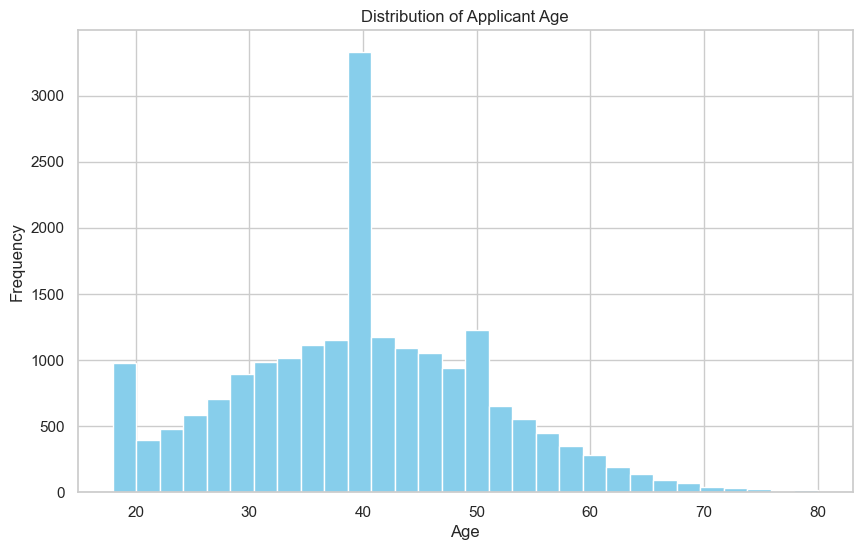

/var/folders/yr/vb_4tcs14gl0thlbk5yxd59w0000gn/T/ipykernel_863/1046504199.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='JobStatus', y='BondingRiskRating', data=aerogel_bonding_df, palette='Set2')


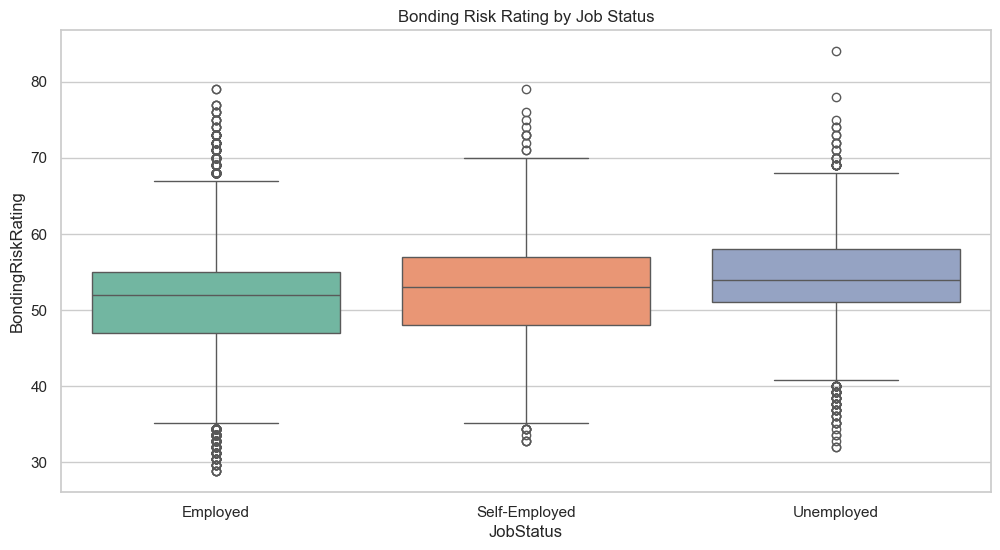

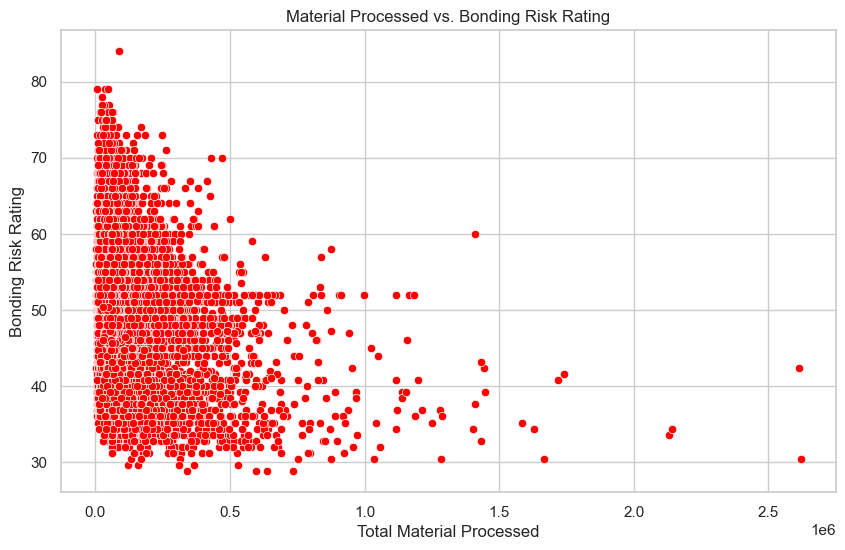

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.89
Confusion Matrix:
 [[4486  210]
 [ 465  839]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.96      0.93      4696
         1.0       0.80      0.64      0.71      1304

    accuracy                           0.89      6000
   macro avg       0.85      0.80      0.82      6000
weighted avg       0.88      0.89      0.88      6000

ROC AUC: 0.94
Average Precision: 0.79


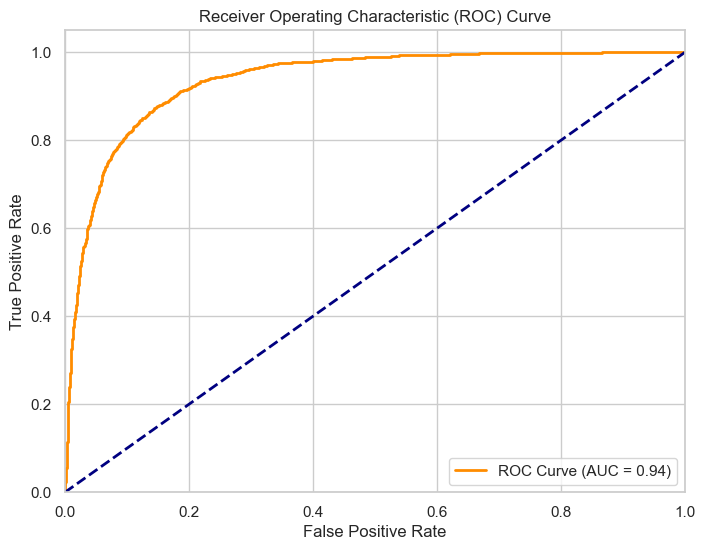

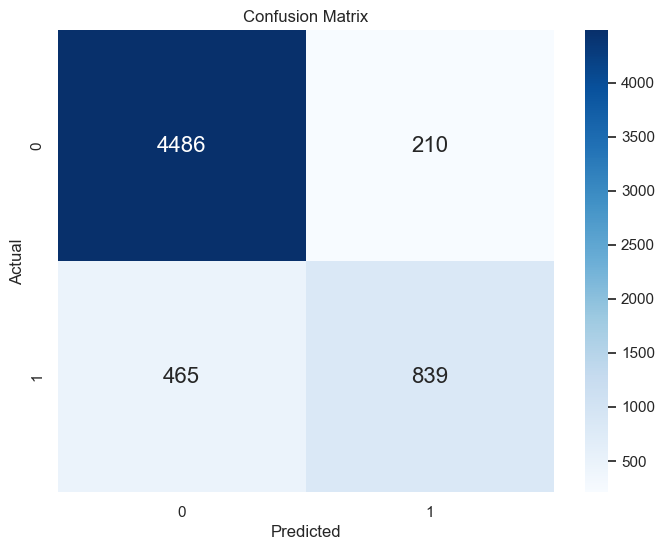

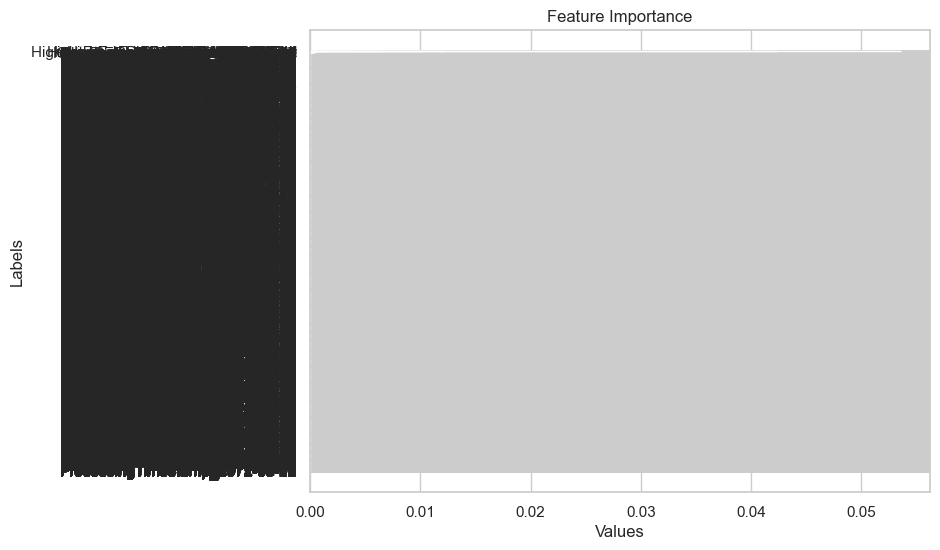

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mlt
import seaborn as sns

import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve,precision_recall_curve, average_precision_score,accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

aerogel_bonding_df = pd.read_csv("aerogel_bonding.csv")
# Display the first few rows of the dataframe
print(aerogel_bonding_df.head())
# Get a concise summary of the dataframe
print(aerogel_bonding_df.info())
# Describe the data to get mean, median, etc.
print(aerogel_bonding_df.describe())
# Check for missing values
print(aerogel_bonding_df.isnull().sum())

# Fill missing values:
# For numeric columns, use the median
for column in aerogel_bonding_df.select_dtypes(include=['number']).columns:
    aerogel_bonding_df[column].fillna(aerogel_bonding_df[column].median(), inplace=True)

# For categorical data, we used mode or a specified placeholder
for column in aerogel_bonding_df.select_dtypes(include=['object']).columns:
    aerogel_bonding_df[column].fillna(aerogel_bonding_df[column].mode()[0], inplace=True)  

# Verify that there are no more missing values
print(aerogel_bonding_df.isnull().sum())

# Setting aesthetic parameters in one step
sns.set(style="whitegrid")

# Histograms for distributions of numeric features
plt.figure(figsize=(10, 6))
aerogel_bonding_df['ApplicantAge'].hist(bins=30, color='skyblue')
plt.title('Distribution of Applicant Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Boxplots for comparing distributions across categorical variables
plt.figure(figsize=(12, 6))
sns.boxplot(x='JobStatus', y='BondingRiskRating', data=aerogel_bonding_df, palette='Set2')
plt.title('Bonding Risk Rating by Job Status')
plt.show()

# Scatter plot for relationships between continuous variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalMaterialProcessed', y='BondingRiskRating', data=aerogel_bonding_df, color='red')
plt.title('Material Processed vs. Bonding Risk Rating')
plt.xlabel('Total Material Processed')
plt.ylabel('Bonding Risk Rating')
plt.show()

# Define target and features
target_column = 'BondingSuccessful'  # Replace this with your actual target column if different
X = aerogel_bonding_df.drop(columns=[target_column])  # Features
y = aerogel_bonding_df[target_column]  # Target variable

# Handle categorical features if any (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
logistic_model = LogisticRegression()

# Train the model on the standardized data
logistic_model.fit(X_train, y_train)

# Make predictions using the trained Logistic Regression model
y_pred = logistic_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', confusion)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

# Calculate ROC curve and AUC
y_prob = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
print(f'ROC AUC: {roc_auc:.2f}')

# Calculate precision-recall curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)
print(f'Average Precision: {average_precision:.2f}')

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

coefficients = np.abs(logistic_model.coef_[0])
feature_names = X.columns
coef_importance = list(zip(feature_names, coefficients))
coef_importance.sort(key=lambda x: x[1], reverse=True)

labels, values = zip(*coef_importance)
plt.figure(figsize=(8, 6))
plt.barh(labels, values, color='skyblue')
plt.xlabel('Values')
plt.ylabel('Labels')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to display the top feature at the top
plt.show()


CLASSIFICATION DECISION TREE - TRAINING AND TESTING

(12597, 16190) (4320, 16190) (1080, 16190) (12597,) (4320,) (1080,)
Validation set performance:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      3286
         1.0       0.96      0.94      0.95      1034

    accuracy                           0.98      4320
   macro avg       0.97      0.96      0.97      4320
weighted avg       0.98      0.98      0.98      4320

Confusion matrix:
[[3246   40]
 [  65  969]]


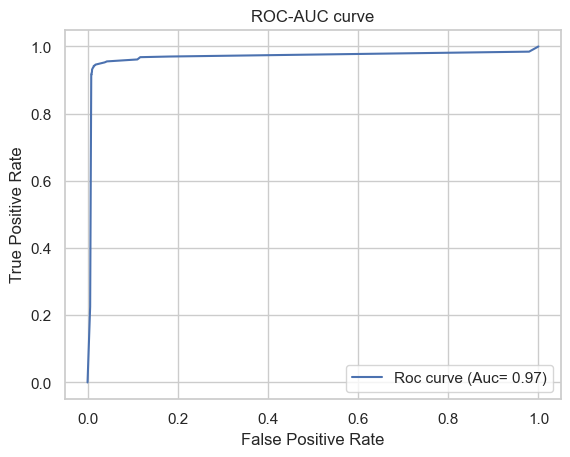

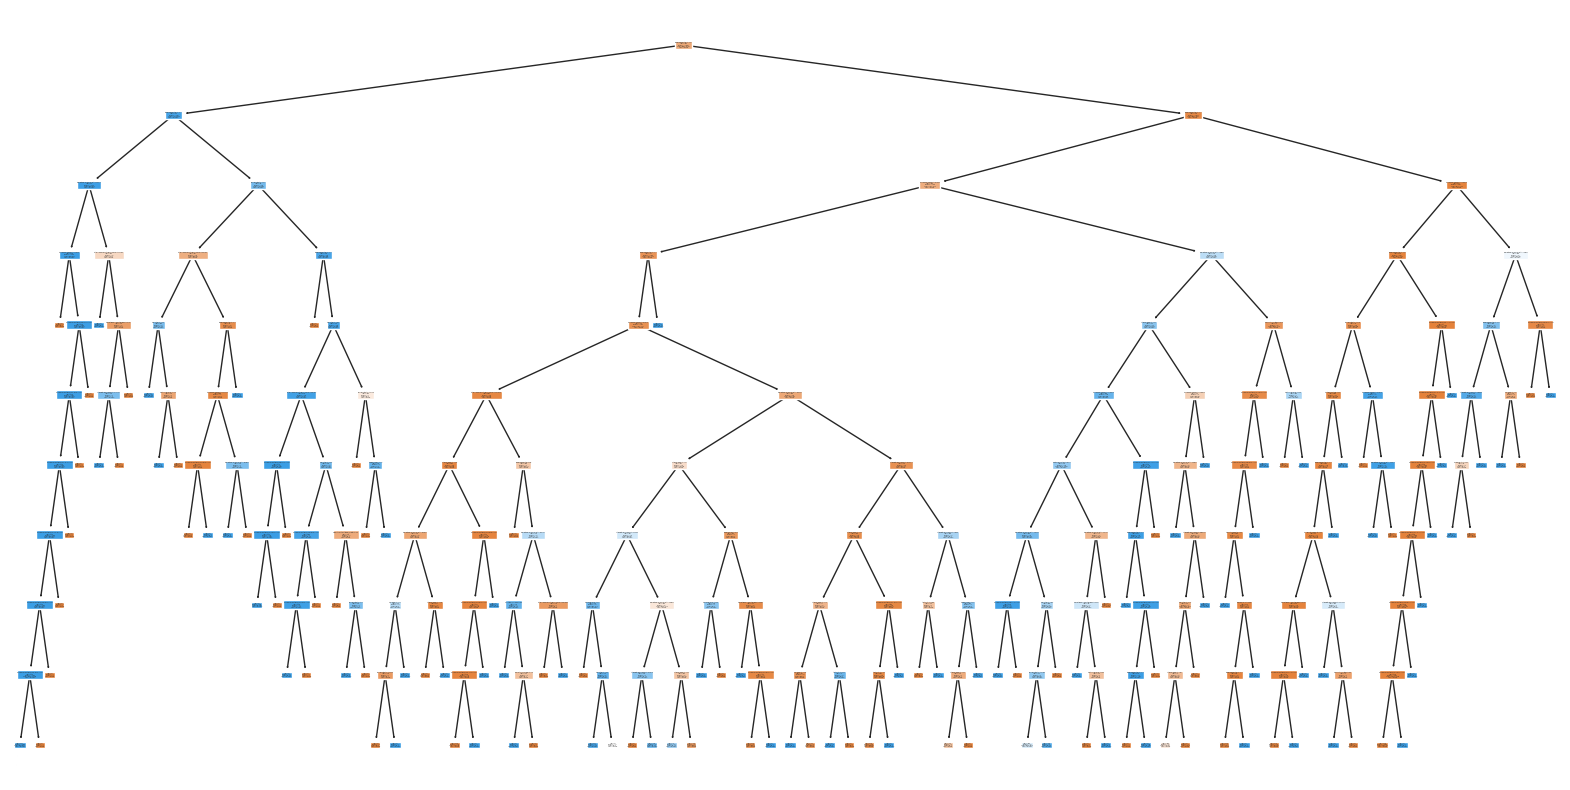

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mlt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.tree import plot_tree

file=pd.read_csv("aerogel_bonding.csv")
file= file.dropna(subset=['BondingSuccessful'])

X= file.drop('BondingSuccessful', axis=1)
y=file['BondingSuccessful']

# encode to get categorical variables
X = pd.get_dummies(X, drop_first=True)

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp)
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

clf=DecisionTreeClassifier(max_depth=10, random_state=42, max_features=None)
clf.fit(X_train, y_train)

y_val_pred=clf.predict(X_val)
y_val_prob=clf.predict_proba(X_val)[:,1]

print(f'Validation set performance:')
print(classification_report(y_val,y_val_pred))

print(f'Confusion matrix:')
print(confusion_matrix(y_val,y_val_pred))

roc_auc=roc_auc_score(y_val,y_val_prob)
fpr,tpr,thresholds=roc_curve(y_val,y_val_prob)
plt.figure()
plt.plot(fpr,tpr,label=f'Roc curve (Auc= {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC curve')
plt.legend()
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns.astype(str), class_names=['Failure', 'Success'], filled=True)
plt.show()

CLASSIFICATION AND DECISION TREE - TUNING

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 2}

 Evaluating the tuned model on validation set ...
Validation Performance(Tuned model:)
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      2752
         1.0       0.91      0.95      0.93       866

    accuracy                           0.97      3618
   macro avg       0.95      0.96      0.95      3618
weighted avg       0.97      0.97      0.97      3618

Confusion matrix(Tuned model:)
[[2675   77]
 [  44  822]]


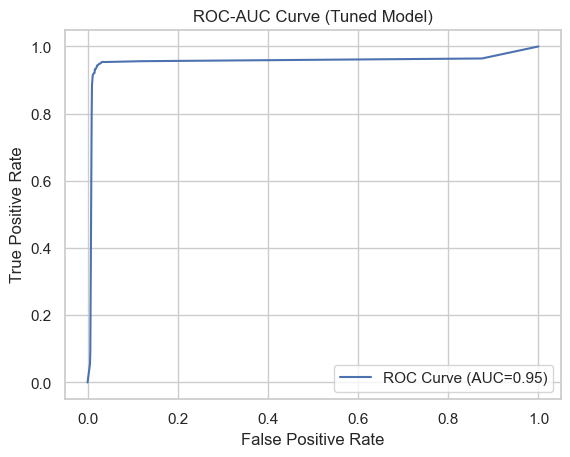

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
file=pd.read_csv("aerogel_bonding.csv")
file=file.dropna(subset=['BondingSuccessful'])
X=file.drop('BondingSuccessful', axis=1)
y=file['BondingSuccessful']
categorical_cols=X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42, stratify=y_temp)
param_grid={'n_estimators':[50,100],
           'max_depth':[None,10],
           'min_samples_split':[2,5],
           'class_weight':['balanced']}  
grid_search=GridSearchCV(DecisionTreeClassifier(random_state=42),
                         param_grid,
                         scoring='f1',
                         cv=5,
                         verbose=1
)
param_grid={'max_depth':[None,10],
           'min_samples_split':[2,5],
           'class_weight':['balanced']}  
grid_search=GridSearchCV(DecisionTreeClassifier(random_state=42),
                         param_grid,
                         scoring='f1',
                         cv=5,
                         verbose=1
)
grid_search.fit(X_train,y_train)
print('Best parameters:',grid_search.best_params_)
best_clf=grid_search.best_estimator_
print('\n Evaluating the tuned model on validation set ...')
y_val_pred_tuned=best_clf.predict(X_val)
y_val_prob_tuned=best_clf.predict_proba(X_val)[:,1]
print('Validation Performance(Tuned model:)')
print(classification_report(y_val,y_val_pred_tuned))
print('Confusion matrix(Tuned model:)')
print(confusion_matrix(y_val,y_val_pred_tuned))
roc_auc_tuned=roc_auc_score(y_val,y_val_prob_tuned)
fpr_tuned,tpr_tuned,_=roc_curve(y_val,y_val_prob_tuned)
plt.figure()
plt.plot(fpr_tuned, tpr_tuned, label=f'ROC Curve (AUC={roc_auc_tuned:.2f})')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve (Tuned Model)")
plt.legend()
plt.show()

ENSEMBLE - RANDOM FOREST CLASSIFIER - TRAINING AND VALIDATION

(12597, 16190) (3618, 16190) (1782, 16190) (12597,) (3618,) (1782,)
Validation set performance:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      2752
         1.0       0.99      0.81      0.89       866

    accuracy                           0.95      3618
   macro avg       0.96      0.90      0.93      3618
weighted avg       0.95      0.95      0.95      3618

Confusion matrix(VALIDATION):
[[2742   10]
 [ 166  700]]


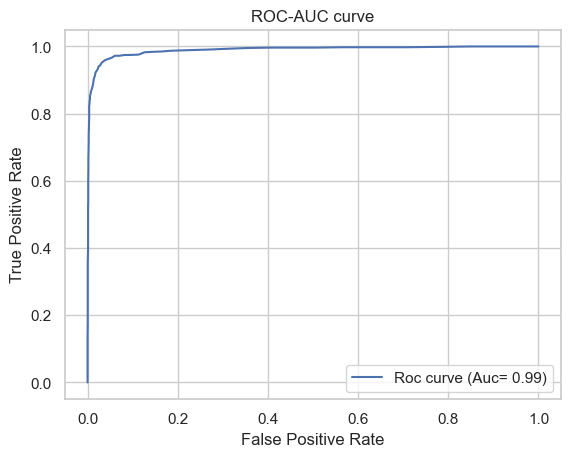

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

file=pd.read_csv("aerogel_bonding.csv")
#Splitting the dataset into training and validation set 
file= file.dropna(subset=['BondingSuccessful'])#drop null values
X=file.drop('BondingSuccessful', axis=1)
y=file['BondingSuccessful']
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True) 
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42, stratify=y_temp)
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)
#so training set has 12,597 rows and 30 features, validation set has 3,618 rows and 30 features
#test set has 1,782 rows and 30 features
#training target has 12,597 labels,validation has 3,618 labels and test target has 1,782 


#NOW TRAINING THE MODEL USING RANDFOM FORST CLASSIFIER
random_f=RandomForestClassifier(random_state=42)
random_f.fit(X_train,y_train)
#setting up predictions on validation set
print(f'Validation set performance:')
y_val_pred=random_f.predict(X_val)
y_val_prob=random_f.predict_proba(X_val)[:,1] #this line is used for the probabilities for ROC-AUC
#evaluation
print(classification_report(y_val,y_val_pred))
#confusion matrix
print(f'Confusion matrix(VALIDATION):')
print(confusion_matrix(y_val,y_val_pred))
#ROC-AUC CURVE
roc_auc=roc_auc_score(y_val,y_val_prob)
fpr,tpr,thresholds=roc_curve(y_val,y_val_prob)
plt.figure()
plt.plot(fpr,tpr,label=f'Roc curve (Auc= {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC curve')
plt.legend()
plt.show()

#confusion matrix[2736   16
#                  179   687]  ,2736(TN) PREDICTIONS where model correctly identified class 0
#                               16(FP) where model mistakenly identified class 1 
#                               179(FN) where model missed identifying class 1
#                               687(TP)where model correctly identified class 1 


#Validation test performance 
#PRECISION:
# for class 0 : 94% of predicted negatives were correct
#for class 1 :98% of predicted postives were correct
# wighted precision is 95%
#RECALL:
#for class 0 :99% of actual negatives were identified 
# for class 1 .79% of actual positives identified correctly
# recall could be better for class 1 , missing 21% of actual positives
#F1-SCORE:
#combining precison and recall , class 0 has 0.97 F1-score, class 1 0.88
#ACCURACY:
#model has 95% accuracy

#ROC-AUC curve
#AUC=0.99 , excellent discriminative ability , high sensitivity and specifivity



ENSEMBLE - RANDOM FOREST CLASSIFIER - TESTING

Test performamce (Untuned model):
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      1356
         1.0       0.98      0.69      0.81       426

    accuracy                           0.92      1782
   macro avg       0.94      0.84      0.88      1782
weighted avg       0.93      0.92      0.92      1782

Confusion matrix(Untuned model):
[[1350    6]
 [ 134  292]]


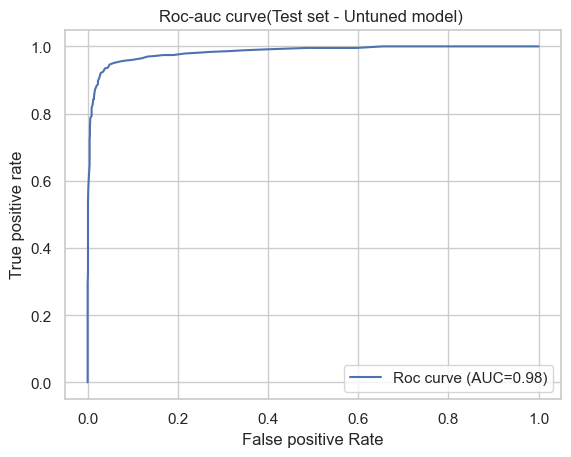

In [6]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
from  sklearn.ensemble import RandomForestClassifier


file=pd.read_csv("aerogel_bonding.csv")
file=file.dropna(subset=['BondingSuccessful'])
X=file.drop('BondingSuccessful',axis=1)
y=file['BondingSuccessful']
categorical_cols=X.select_dtypes(include=['object']).columns
X=pd.get_dummies(X,columns=categorical_cols,drop_first=True)

from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42, stratify=y_temp)

random_f=RandomForestClassifier(random_state=42)
random_f.fit(X_val,y_val)
print(f'Test performamce (Untuned model):')
y_test_pred=random_f.predict(X_test)
y_test_prob=random_f.predict_proba(X_test)[:,1]
#classification report and confusion matrix of test set
print(classification_report(y_test,y_test_pred))
print('Confusion matrix(Untuned model):')
print(confusion_matrix(y_test,y_test_pred))

roc_auc_test=roc_auc_score(y_test,y_test_prob)
fpr_test,tpr_test,_=roc_curve(y_test,y_test_prob)

plt.figure()
plt.plot(fpr_test,tpr_test,label=f'Roc curve (AUC={roc_auc_test:.2f})')
plt.xlabel('False positive Rate')
plt.ylabel('True positive rate')
plt.title('Roc-auc curve(Test set - Untuned model) ')
plt.legend()
plt.show()


#test set performance displays how the metrics are consistent and no different to the validation set , so overall well-perfroming on unseen data 


RANDOM FOREST TUNING 

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}

 Evaluating the tuned model on validation set ...
Validation Performance(Tuned model:)
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      2752
         1.0       0.97      0.83      0.90       866

    accuracy                           0.95      3618
   macro avg       0.96      0.91      0.93      3618
weighted avg       0.96      0.95      0.95      3618

Confusion matrix(Tuned model:)
[[2730   22]
 [ 143  723]]
model saved


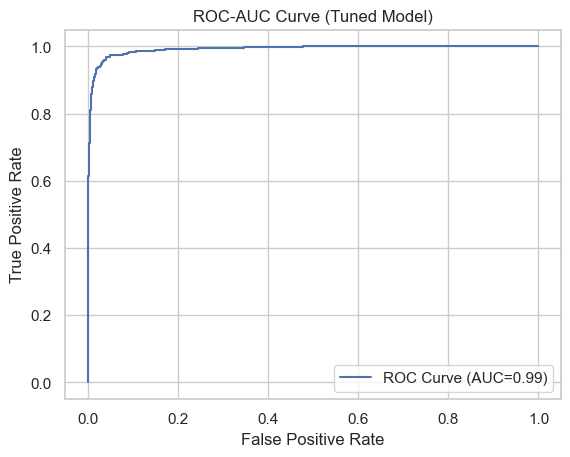

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from joblib import dump

file=pd.read_csv("aerogel_bonding.csv")
file=file.dropna(subset=['BondingSuccessful'])
X=file.drop('BondingSuccessful', axis=1)
y=file['BondingSuccessful']
categorical_cols=X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42, stratify=y_temp)
param_grid={'n_estimators':[50,100],
           'max_depth':[None,10],
           'min_samples_split':[2,5],
           'class_weight':['balanced']}  #2x2x2x1=8 candidates , do 8x5 =40 fits
grid_search=GridSearchCV(RandomForestClassifier(random_state=42),
                         param_grid,
                         scoring='f1',
                         cv=5,
                         verbose=1
)
grid_search.fit(X_train,y_train)
print('Best parameters:',grid_search.best_params_)
best_random_f_model=grid_search.best_estimator_
print('\n Evaluating the tuned model on validation set ...')
y_val_pred_tuned=best_random_f_model.predict(X_val)
y_val_prob_tuned=best_random_f_model.predict_proba(X_val)[:,1]
print('Validation Performance(Tuned model:)')
print(classification_report(y_val,y_val_pred_tuned))
print('Confusion matrix(Tuned model:)')
print(confusion_matrix(y_val,y_val_pred_tuned))
dump(best_random_f_model,'tuned_random_model.joblib')
print('model saved')

roc_auc_tuned=roc_auc_score(y_val,y_val_prob_tuned)
fpr_tuned,tpr_tuned,_=roc_curve(y_val,y_val_prob_tuned)
plt.figure()
plt.plot(fpr_tuned, tpr_tuned, label=f'ROC Curve (AUC={roc_auc_tuned:.2f})')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve (Tuned Model)")
plt.legend()
plt.show()


#after output , parameters chosen were {class weight:balanced,max_depth:None,min_samples_split:5,n.estimators>:100}
#so no restriction on tree depth, nodes must have at least 5 samples to split,100 n of trees in the forest
#these parameters are being used to improve the F1 score
# the perfromamce values show an overall enhancement , as well as the confusion matrix , only 26 + 124 missed predictions
#auc stays 0.99
# recall for class 1 improved from 0.79 to 0.84 showing fewer false negatives


#saving into a pickle file 


COMPARISON OF THE THREE CLASSIFICATION MODELS WE USED

In [11]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


models = {
    'Random Forest': best_random_f_model,
    # 'Logistic Regression': best_model,
    'Decision Tree': best_clf
}


print("Models dictionary:", models)

results = []

for model_name, model in models.items():
    print(f"Evaluating model: {model_name}")
    y_pred = model.predict(X_test)
    
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_pred_proba = None
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    if y_pred_proba is not None:
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = None
    
    result = {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    }
    
    results.append(result)


results_df = pd.DataFrame(results).set_index('Model')
print(results_df)

Models dictionary: {'Random Forest': RandomForestClassifier(class_weight='balanced', min_samples_split=5,
                       random_state=42), 'Decision Tree': DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=42)}
Evaluating model: Random Forest
Evaluating model: Decision Tree
               Accuracy  Precision    Recall  F1 Score   ROC AUC
Model                                                           
Random Forest  0.948373   0.951351  0.826291  0.884422  0.989262
Decision Tree  0.958474   0.887665  0.946009  0.915909  0.948522
